2 coupled Fitz Hugh Nagumo for coupling investigation

Initial parameters

In [141]:
"""Scaling constants k1-k3"""
k1 = 160
k2 = 90

"""Alpha values"""
a1 = -0.1
a2 = -0.1

"""Epsilon values"""
e1 = 0.01
e2 = 0.01

"""Beta values"""
b1 = 0.1
b2 = 0.2

"""Coupling constants f"""
f1 = 0.1
f2 = 1

Solving the 2 coupled FHN

In [142]:
from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.legend import Legend

params=[f1,f2]

def fhn(x, t):
    # constants

    V1 = x[0]
    R1 = x[1]
    V2 = x[2]
    R2 = x[3]
    # couplings from SA - > AV
    dV1dt = k1*(V1 * (a1 - V1) * (V1 - 1) - R1 + f2*(V1-V2))
    dR1dt = k1*(e1 * (V1 - b1 * R1))

    dV2dt = k2*(V2 * (a2 - V2) * (V2 - 1) - R2 + f1*(V2-V1))
    dR2dt = k2*(e2 * (V2 - b2 * R2))

    return [dV1dt,dR1dt,dV2dt,dR2dt]


x0 = [0.1,0,0.1,0] # initial conditions
t = np.linspace(0,5,1000) # time
x = odeint(fhn,x0,t)

V1 = x[:,0]
W1 = x[:,1]
V2 = x[:,2]
W2 = x[:,3]

Plotting the 2 coupled FHN

Settings for the SA Subplot AV and plotting of the two graphs

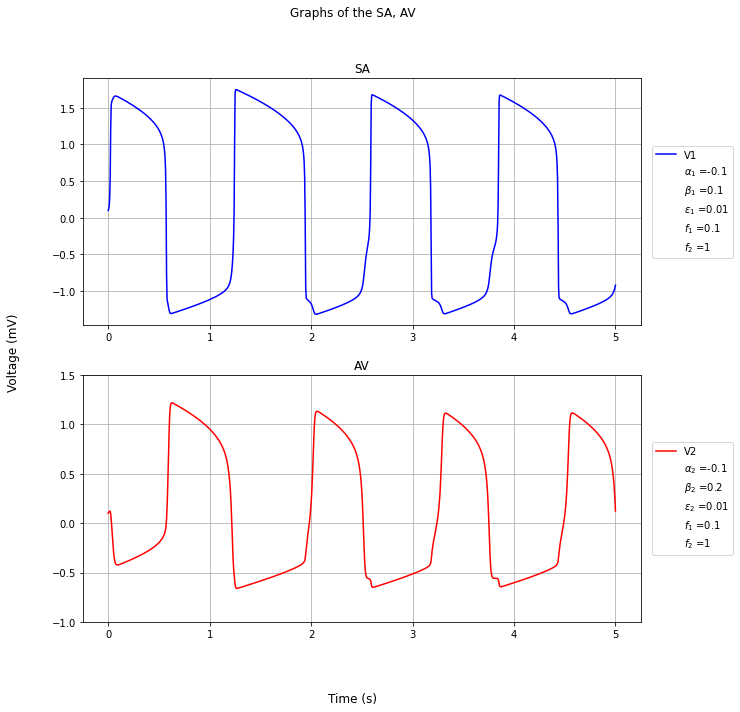

In [143]:
fig, (ax0,ax1) = plt.subplots(2,figsize=(10,10))


plt.suptitle('Graphs of the SA, AV')




"""Graph for the SA Subplot """

ax0.title.set_text('SA')
ax0.plot(t,V1, label='V1', color='b')  # V1 label

ax0.plot([ ],[ ],' ',label=r'$\alpha_1$ ={}'.format(a1))   # alpha1
ax0.plot([ ],[ ],' ',label=r'$\beta_1$ ={}'.format(b1))     # beta1
ax0.plot([ ],[ ],' ',label=r'$\epsilon_1$ ={}'.format(e1))     # epsilon1
ax0.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9)

"""Bellow are the couplings constants f1 for the first SA equations - uncomment if not needed"""

ax0.plot([ ],[ ],' ',label=r'$f_1$ ={}'.format(f1))   #coupling constant f1 for V1
ax0.plot([ ],[ ],' ',label=r'$f_2$ ={}'.format(f2))   #coupling constant f2 for V1


"""Graph for the AV Subplot"""

ax1.title.set_text('AV')
ax1.plot(t,V2, label='V2', color='r')  # V2 label

ax1.plot([ ],[ ],' ',label=r'$\alpha_2$ ={}'.format(a2))   # alpha2
ax1.plot([ ],[ ],' ',label=r'$\beta_2$ ={}'.format(b2))     # beta2
ax1.plot([ ],[ ],' ',label=r'$\epsilon_2$ ={}'.format(e2))     # epsilon2
ax1.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9)

"""Bellow are the couplings constants f1 for the first AV equations - uncomment if not needed"""

ax1.plot([ ],[ ],' ',label=r'$f_1$ ={}'.format(f1))   #coupling constant f1 for V2
ax1.plot([ ],[ ],' ',label=r'$f_2$ ={}'.format(f2))   #coupling constant f2 for V2



"""Plotting matter"""
plt.legend()
ax0.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)
ax1.legend(bbox_to_anchor=(0.85,0.5), loc="center left", borderaxespad=9.5)
ax0.grid()
ax1.grid()
ax0.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
ax1.set_yticks([-1, -0.5, 0, 0.5, 1, 1.5])
fig.supylabel('Voltage (mV)')
fig.supxlabel('Time (s)')
fig.savefig('Two Coupled/SA_AV_f1_01_f2_1.jpeg', bbox_inches="tight")
plt.show()

Linear combination of the two coupled FHN

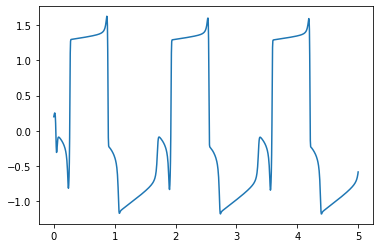

In [121]:
q = 1
w = 1

x = q*V1+w*V2

plt.plot(t, x)
plt.show()